In [39]:
import numpy as np
from pandas import read_csv
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import DataFrame


In [40]:
attrib = read_csv('attributes.csv', delim_whitespace = True)

In [41]:
data = read_csv('communities.data', names = attrib['attributes'])

In [42]:
print(data.shape)

(1994, 128)


In [43]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [44]:
data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]


In [45]:
print(feat_miss)
feat_miss.shape

Index(['county', 'community', 'OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop',
       'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(25,)

In [46]:
# Impute mean values for samples with missing values

from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

#data[''OtherPerCap''].describe()
#from sklearn.impute import SimpleImputer 
#imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") 
#imputer.fit(x) 
#print(imputer.transform(x))


In [47]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 104)


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [48]:
data.columns.values

array(['state', 'communityname', 'fold', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
       'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv',
       'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', '

In [49]:
data.columns.tolist()
data.index.tolist()


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [50]:
from scipy import stats
num_columns = data.select_dtypes(exclude='object').columns

for i in list(num_columns):
    coeff, p_value = stats.pearsonr(data[i], data['ViolentCrimesPerPop'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('P Value is Significant')
        if(0.35<=coeff<=1 or -1<=coeff<=-0.35):
            print('Correlation is  Significant')
        else:
            print('Correlation is not Significant')
        
    else:
        print('P Value is Insignificant')
    print('')

State
Pearson Co-relation: -0.2113975153956961
P-Value: 1.4023098001622335e-21
P Value is Significant
Correlation is not Significant

Fold
Pearson Co-relation: -0.03257666142378169
P-Value: 0.1459021185392418
P Value is Insignificant

Population
Pearson Co-relation: 0.36715737827352585
P-Value: 1.1266176363056112e-64
P Value is Significant
Correlation is  Significant

Householdsize
Pearson Co-relation: -0.03492259533593247
P-Value: 0.11901078469769048
P Value is Insignificant

Racepctblack
Pearson Co-relation: 0.6312636346597025
P-Value: 3.757220267779254e-222
P Value is Significant
Correlation is  Significant

Racepctwhite
Pearson Co-relation: -0.6847695762715431
P-Value: 4.835180488422679e-276
P Value is Significant
Correlation is  Significant

Racepctasian
Pearson Co-relation: 0.03762178678135556
P-Value: 0.09305212073738
P Value is Insignificant

Racepcthisp
Pearson Co-relation: 0.2930502181250693
P-Value: 8.769028477321958e-41
P Value is Significant
Correlation is not Significant


In [51]:
drop = []
for i in list(num_columns):
    coeff, p_value = stats.pearsonr(data[i], data['ViolentCrimesPerPop'])
    if p_value > 0.05:
        drop.append(i)

In [52]:
drop

['fold',
 'householdsize',
 'racePctAsian',
 'PctWorkMomYoungKids',
 'PersPerOccupHous',
 'PctVacMore6Mos',
 'PctSameState85']

In [53]:
#Copy dataframe
data_new=data.copy()

In [54]:
data_new.drop(columns=['householdsize',
 'racePctAsian',
 'PctWorkMomYoungKids',
 'PersPerOccupHous',
 'PctVacMore6Mos',
 'PctSameState85'], inplace=True)
data_new

,state,communityname,fold,population,racepctblack,racePctWhite,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.02,0.90,0.17,0.34,0.47,0.29,...,0.00,0.12,0.42,0.50,0.51,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.12,0.74,0.07,0.26,0.59,0.35,...,0.00,0.21,0.50,0.34,0.60,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.49,0.56,0.04,0.39,0.47,0.28,...,0.00,0.14,0.49,0.54,0.67,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,1.00,0.08,0.10,0.51,0.50,0.34,...,0.00,0.19,0.30,0.73,0.64,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.02,0.95,0.05,0.38,0.38,0.23,...,0.00,0.11,0.72,0.64,0.61,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,10,0.01,0.10,0.87,0.16,0.43,0.51,0.35,...,0.00,0.22,0.28,0.34,0.48,0.01,0.28,0.05,0.00,0.09
1990,6,Seasidecity,10,0.05,0.46,0.28,0.32,0.69,0.86,0.73,...,0.00,0.53,0.25,0.17,0.10,0.02,0.37,0.20,0.00,0.45
1991,9,Waterburytown,10,0.16,0.25,0.69,0.25,0.35,0.50,0.31,...,0.02,0.25,0.68,0.61,0.79,0.08,0.32,0.18,0.91,0.23
1992,25,Walthamcity,10,0.08,0.06,0.87,0.10,0.58,0.74,0.63,...,0.01,0.45,0.64,0.54,0.59,0.03,0.38,0.33,0.22,0.19


In [55]:
data_update=data_new.copy()
data_update


,state,communityname,fold,population,racepctblack,racePctWhite,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.02,0.90,0.17,0.34,0.47,0.29,...,0.00,0.12,0.42,0.50,0.51,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.12,0.74,0.07,0.26,0.59,0.35,...,0.00,0.21,0.50,0.34,0.60,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.49,0.56,0.04,0.39,0.47,0.28,...,0.00,0.14,0.49,0.54,0.67,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,1.00,0.08,0.10,0.51,0.50,0.34,...,0.00,0.19,0.30,0.73,0.64,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.02,0.95,0.05,0.38,0.38,0.23,...,0.00,0.11,0.72,0.64,0.61,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,10,0.01,0.10,0.87,0.16,0.43,0.51,0.35,...,0.00,0.22,0.28,0.34,0.48,0.01,0.28,0.05,0.00,0.09
1990,6,Seasidecity,10,0.05,0.46,0.28,0.32,0.69,0.86,0.73,...,0.00,0.53,0.25,0.17,0.10,0.02,0.37,0.20,0.00,0.45
1991,9,Waterburytown,10,0.16,0.25,0.69,0.25,0.35,0.50,0.31,...,0.02,0.25,0.68,0.61,0.79,0.08,0.32,0.18,0.91,0.23
1992,25,Walthamcity,10,0.08,0.06,0.87,0.10,0.58,0.74,0.63,...,0.01,0.45,0.64,0.54,0.59,0.03,0.38,0.33,0.22,0.19


In [56]:
positive = []
for i in list(num_columns):
    coeff, p_value = stats.pearsonr(data[i], data['ViolentCrimesPerPop'])
    if coeff > 0.4:
        positive.append(i)
        
negative =[]
for i in list(num_columns):
    coeff, p_value = stats.pearsonr(data[i], data['ViolentCrimesPerPop'])
    if coeff < -0.4:
        negative.append(i)

In [57]:
positive

['racepctblack',
 'pctWPubAsst',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'NumIlleg',
 'PctIlleg',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'HousVacant',
 'PctVacantBoarded',
 'PctHousNoPhone',
 'ViolentCrimesPerPop']

In [58]:
negative

['racePctWhite',
 'medIncome',
 'pctWInvInc',
 'medFamInc',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctPersOwnOccup',
 'PctHousOwnOcc']

In [59]:
dataset1=data[['racepctblack',
 'pctWPubAsst',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'NumIlleg',
 'PctIlleg',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'HousVacant',
 'PctVacantBoarded',
 'PctHousNoPhone',
'racePctWhite',
 'medIncome',
 'pctWInvInc',
 'medFamInc',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctPersOwnOccup',
 'PctHousOwnOcc','ViolentCrimesPerPop']]

In [60]:
dataset1

,racepctblack,pctWPubAsst,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctUnemployed,MalePctDivorce,FemalePctDiv,TotalPctDiv,...,medIncome,pctWInvInc,medFamInc,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,PctHousOwnOcc,ViolentCrimesPerPop
0,0.02,0.15,0.08,0.19,0.10,0.18,0.27,0.68,0.75,0.75,...,0.37,0.60,0.39,0.55,0.59,0.61,0.56,0.55,0.52,0.20
1,0.12,0.29,0.01,0.24,0.14,0.24,0.27,1.00,0.91,1.00,...,0.31,0.45,0.29,0.43,0.47,0.60,0.39,0.26,0.24,0.67
2,0.49,0.40,0.01,0.27,0.27,0.43,0.36,0.63,0.71,0.70,...,0.30,0.39,0.28,0.42,0.44,0.43,0.43,0.42,0.41,0.43
3,1.00,0.20,0.01,0.10,0.09,0.25,0.33,0.34,0.49,0.44,...,0.58,0.43,0.51,0.65,0.54,0.83,0.65,0.94,0.96,0.12
4,0.02,0.11,0.00,0.06,0.25,0.30,0.12,0.22,0.20,0.21,...,0.50,0.68,0.46,0.91,0.91,0.89,0.85,0.89,0.87,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.10,0.06,0.01,0.16,0.08,0.11,0.12,0.39,0.59,0.53,...,0.42,0.64,0.41,0.63,0.68,0.67,0.59,0.55,0.55,0.09
1990,0.46,0.37,0.04,0.32,0.33,0.37,0.24,0.42,0.56,0.48,...,0.28,0.30,0.24,0.66,0.63,0.69,0.70,0.12,0.22,0.45
1991,0.25,0.48,0.12,0.31,0.52,0.58,0.50,0.50,0.50,0.52,...,0.31,0.45,0.35,0.42,0.42,0.47,0.47,0.38,0.37,0.23
1992,0.06,0.24,0.03,0.16,0.30,0.35,0.37,0.32,0.30,0.32,...,0.44,0.55,0.47,0.64,0.65,0.75,0.71,0.39,0.33,0.19


In [73]:
X = dataset1.iloc[:, 0:27].values 
y = dataset1.iloc[:, 27].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X,y

(array([[0.02, 0.15, 0.08, ..., 0.56, 0.55, 0.52],
        [0.12, 0.29, 0.01, ..., 0.39, 0.26, 0.24],
        [0.49, 0.4 , 0.01, ..., 0.43, 0.42, 0.41],
        ...,
        [0.25, 0.48, 0.12, ..., 0.47, 0.38, 0.37],
        [0.06, 0.24, 0.03, ..., 0.71, 0.39, 0.33],
        [0.14, 0.47, 0.16, ..., 0.6 , 0.46, 0.49]]),
 array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48]))

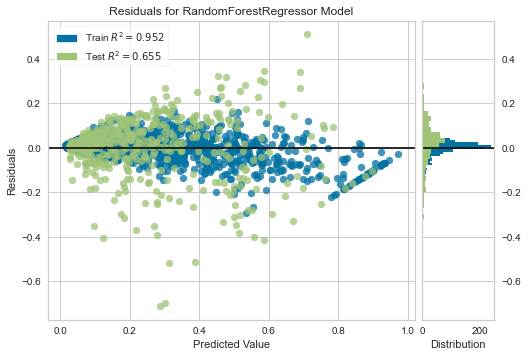

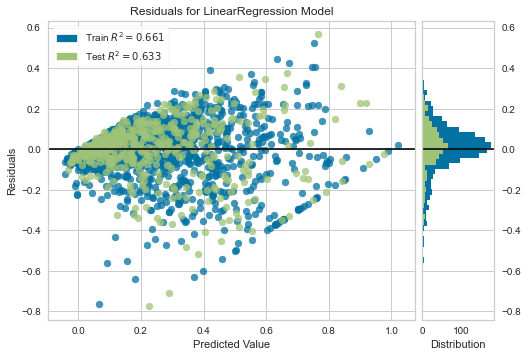

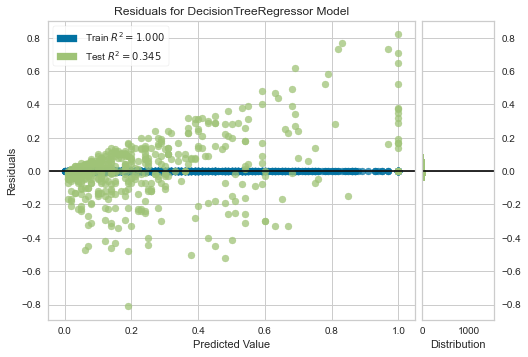

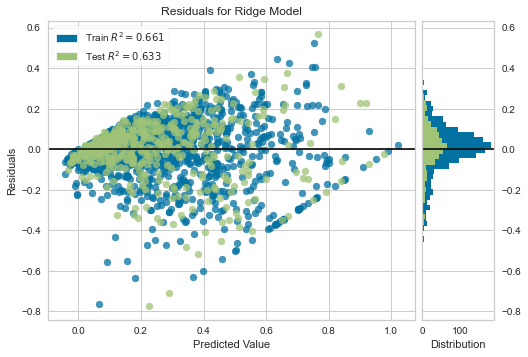

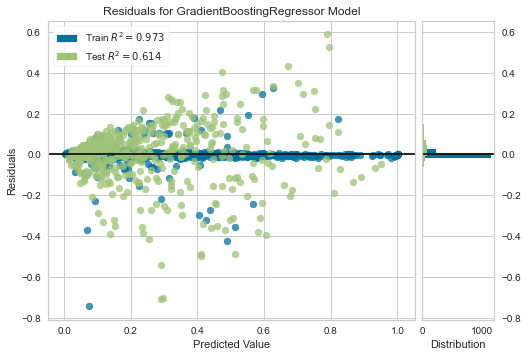

In [74]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor  
#Import the Simple Linear Regression 
from sklearn.linear_model import LinearRegression
#Import the Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Ridge
from sklearn import ensemble
#clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          #learning_rate = 0.1, loss = 'ls')
#ddd = clf.fit(X_train, y_train)

RFReg = RandomForestRegressor(n_estimators = 500,random_state = 0)  
RFReg.fit(X_train, y_train)
RidgeReg = Ridge(alpha=0.01)
RidgeReg.fit(X_train, y_train)
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

DtReg = DecisionTreeRegressor(random_state = 0)  
DtReg.fit(X_train, y_train)

from yellowbrick.regressor import residuals_plot
viz = residuals_plot(RFReg,X_train,y_train,X_test, y_test)
viz = residuals_plot(LinReg,X_train,y_train, X_test, y_test)
viz = residuals_plot(DtReg, X_train,y_train,X_test, y_test)
viz = residuals_plot(RidgeReg,X_train,y_train,X_test, y_test)
viz = residuals_plot(ddd,X_train,y_train, X_test, y_test)





In [649]:
from sklearn.metrics import mean_squared_error

In [76]:
#Predicted Height from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinReg.predict(X_test)
y_predict_rfr=RFReg.predict(X_test)
y_predict_dtr=DtReg.predict(X_test)

#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
from jinja2 import Environment, FileSystemLoader
from sklearn.metrics import r2_score
r_square_slr = metrics.r2_score(y_test, y_predict_slr)
#print('R-Square Error associated with Simple Linear Regression:', r_square_slr)
mse_lfl=metrics.mean_absolute_error (y_test, y_predict_dtr)
print(mse_lfl)
#Model Evaluation using R-Square for Random Forest Regression
r_square_rfr = metrics.r2_score(y_test, y_predict_rfr)

r_square_dtr = metrics.r2_score(y_test, y_predict_dtr)

#print('R-Square Error associated with Random Forest Regression:', r_square_rfr)
file_loader=FileSystemLoader('templates')
env=  Environment(loader=file_loader)
model_print=env.get_template('modelA.txt')
print(model_print.render(r_slr=r_square_slr, r_rfr=r_square_rfr,r_dtr=r_square_dtr))


0.12663326653306614
The R-Square Error associated with Simple Linear Regression is 0.632898930257949.

The R-Square Error associated with Random Forest Regression is 0.6545337888205665.

The R-Square Error associated with Decision Tree Regression is 0.3446122806681615.


In [77]:
print(1-(1-r2_score(y_test, y_predict_rfr))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.6347299932752486


In [78]:
Adj_r2 = 1 - (1-r_square_rfr) * (len(y)-1)/(len(y)-X.shape[1]-1)

In [79]:
Adj_r2

0.6497893393282752

In [699]:
p_value_state = env.get_template('p-value')
coefficient_state = env.get_template('coeff.txt')

#Xcol=['racepctblack','pctWPubAsst','PctPopUnderPov', 'PctUnemployed','MalePctDivorce','FemalePctDiv','TotalPctDiv','PctIlleg','racePctWhite','pctWInvInc','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup']
#ycol="Violent Crimes Per Pop"

def GetCorrelation(data,Xcol):
    p_values=[]
    coeff_values=[]
    columns_chosen=[]
    correlation=[]
    independent_variables_number=0
    for i in list(Xcol):
        coeff, p_value = stats.pearsonr(data[i], data['ViolentCrimesPerPop'])
        p_values.append(p_value)
        coeff_values.append(coeff)
        independent_variables_number +=1
        correlation.append(((data[[i,'ViolentCrimesPerPop']].corr())))#changed this to append

    for i in range(independent_variables_number):
        print(p_value_state.render(dependent_variable_name=ycol,independent_variable_name=Xcol[i],p_value_of_independent_variable=p_values[i],coeff_value_of_independent_variable=coeff_values[i]))
    
    for i in range(independent_variables_number):
        print(coefficient_state.render(dependent_variable_name=ycol,independent_variable_name=Xcol[i],coeff_value_of_independent_variable=coeff_values[i]))    
    for i in range(independent_variables_number):
        plt.figure()
        sns.heatmap(correlation[i], annot = True, fmt='.2g',cmap= 'flare')#graph only one correlation
        plt.show()


In order for a feature to have a significant impact on the dependent variable, the p-value must be lower than the established threshold of 0.05. In this case, the racepctblack has a p-value of 3.757220267779254e-222, which means it has a statistically significant impact on Violent Crimes Per Pop. In other words, a change in the value of racepctblack will affect the value of Violent Crimes Per Pop. In addition to this, you can try adding to the model one of these great columns .
In order for a feature to have a significant impact on the dependent variable, the p-value must be lower than the established threshold of 0.05. In this case, the pctWPubAsst has a p-value of 1.281756197987263e-175, which means it has a statistically significant impact on Violent Crimes Per Pop. In other words, a change in the value of pctWPubAsst will affect the value of Violent Crimes Per Pop. In addition to this, you can try adding to the model one of these great columns .
In order for a feature to have a sig

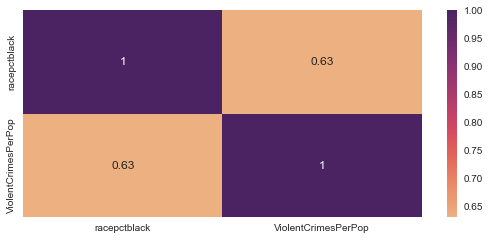

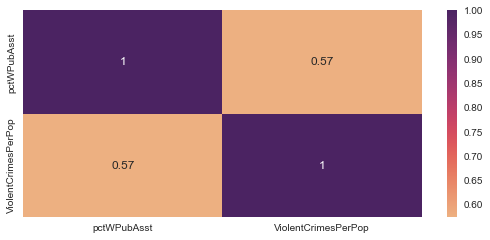

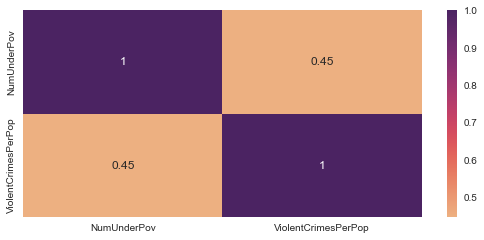

In [703]:
 GetCorrelation(dataset1,['racepctblack',
 'pctWPubAsst',
 'NumUnderPov'])

In [589]:
#### Predicting Violent Crimes per Population based on the first 10 variables using Linear Regression 
violent_pred_slr=LinReg.predict([[0.4,0.6,0.3,0.3,0.5,0.4,0.3,0.8,0.9,0.5,0.2,0.1,0.43,0.54,0.64]]) 
print("Predicted Violent Crimes per Pop using Linear Regression: % s"% violent_pred_slr) 

Predicted Violent Crimes per Pop using Linear Regression: [0.71582668]


In [590]:
#Predicting Violent Crimes per Population based on the first 10 variables using Linear Regression 
violent_pred_rfr=RFReg.predict([[0.4,0.6,0.3,0.3,0.5,0.4,0.3,0.8,0.2,0.5,0.2,0.1,0.43,0.54,0.64]])
print("Predicted Violent Crimes per Pop using Random Forest Regression: % s"% violent_pred_rfr) 


Predicted Violent Crimes per Pop using Random Forest Regression: [0.61346]


In [591]:
violent_pred_dtr=DtReg.predict([[0.4,0.6,0.3,0.3,0.5,0.4,0.3,0.8,0.2,0.5,0.2,0.1,0.43,0.54,0.64]])
print("Predicted Violent Crimes per Pop using Decision Tree Regression: % s"% violent_pred_dtr) 



Predicted Violent Crimes per Pop using Decision Tree Regression: [0.87]


  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(1994, 27)
(1994,)


100% (100 of 100) |######################| Elapsed Time: 0:02:20 Time:  0:02:20


The following section will describe how ViolentCrimesPerPop will change when racepctblack changes.
The following section will describe how ViolentCrimesPerPop will change when pctWPubAsst changes.
The following section will describe how ViolentCrimesPerPop will change when NumUnderPov changes.
The following section will describe how ViolentCrimesPerPop will change when PctPopUnderPov changes.
The following section will describe how ViolentCrimesPerPop will change when PctLess9thGrade changes.
The following section will describe how ViolentCrimesPerPop will change when PctNotHSGrad changes.
The following section will describe how ViolentCrimesPerPop will change when PctUnemployed changes.
The following section will describe how ViolentCrimesPerPop will change when MalePctDivorce changes.
The following section will describe how ViolentCrimesPerPop will change when FemalePctDiv changes.
The following section will describe how ViolentCrimesPerPop will change when TotalPctDiv changes.
The f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



NameError: name 'a' is not defined

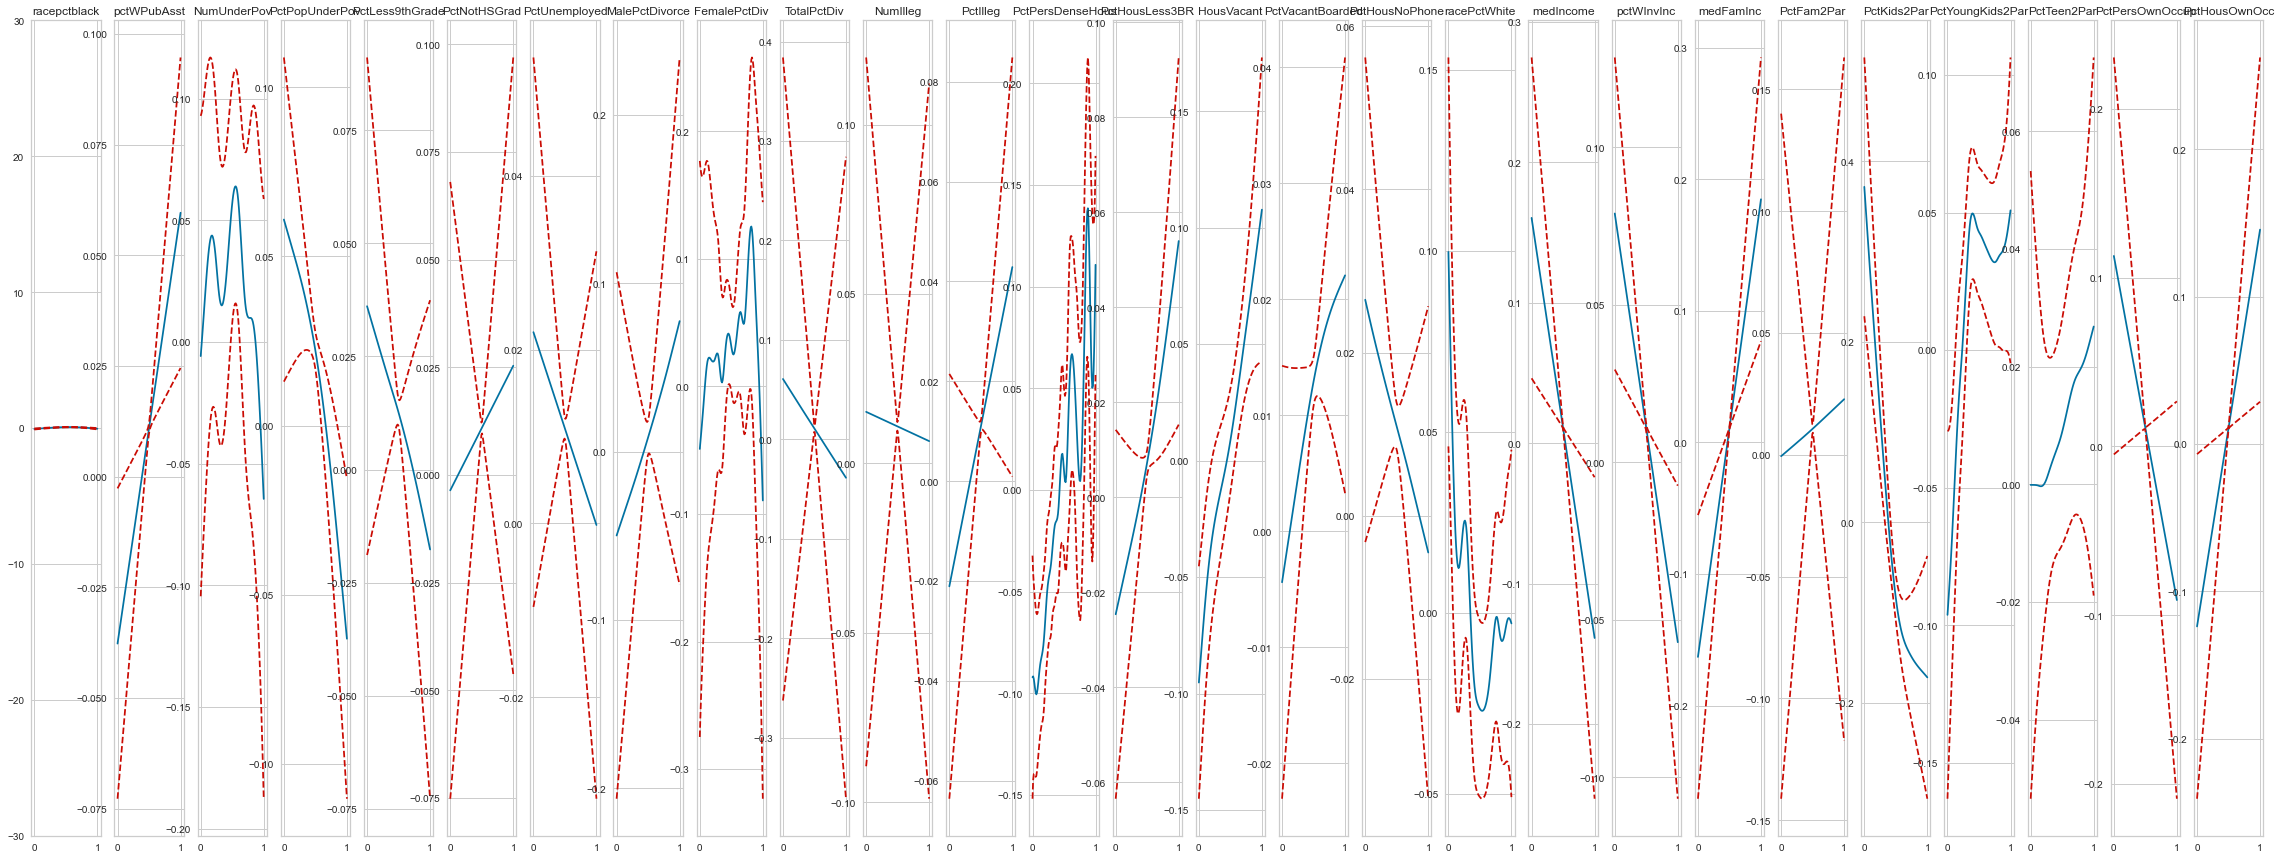

In [81]:
#GAMs model
import scipy.signal as signal
import pandas as pd
from pygam import GAM, LinearGAM, s, f, te
#X = data.drop(['ViolentCrimesPerPop'], axis=1).values
n=27
X = dataset1.iloc[:, 0:n].values
y = dataset1['ViolentCrimesPerPop']
ytitle="ViolentCrimesPerPop"
titles = dataset1.columns[0:n]
print(X.shape)
print(y.shape)

lams = np.random.rand(100, np.size(titles)) #Epochs
lams = lams * np.size(titles) - 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=20).gridsearch(X, y, lam=lams)
# plt.figure()
fig, axs = plt.subplots(1, np.size(titles),figsize=(40, 15))

# Analysis and Story Generate

for i, ax in enumerate(axs):
    print("The following section will describe how " +ytitle+ " will change when " + titles[i] + " changes.")
    #maxfirst=0
    #minfirst=0
    XX = gam.generate_X_grid(term=i)
    Xpre=XX[:, i]
    ypre=gam.partial_dependence(term=i, X=XX)
    #Find minimax
    #maxpoint=signal.argrelextrema(gam.partial_dependence(term=i, X=XX),np.greater)
    #minpoint=signal.argrelextrema(gam.partial_dependence(term=i, X=XX), np.less)
    #maxpoint=maxpoint[0]
    #minpoint=minpoint[0]
    #print(maxpoint)
    #print(minpoint)
    #loopnum = int(np.size(minpoint))+int(np.size(maxpoint))
    #allpoint=np.hstack((maxpoint,minpoint))
    #allpoint.sort()
    
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);
    

gam.summary()
#print("the paprams are" )
#print(gam.get_params(deep=True))
#a=gam.statistics_
r2=a.get('pseudo_r2')
print(r2)
p=a.get('p_values')
#print(p)
#print(gam.statistics_)
plt.show()

y_predict_GAM=gam.predict(X)
violent_pred_GAM=gam.predict([[0.5,0.6,0.2,0.3,0.7,0.4,0.3,0.8,0.2,0.5,0.2,0.6,0.43,0.54,0.56]])
print("Predicted Violent Crimes per Pop using GAM Regression: % s"% violent_pred_GAM) 


In [ ]:
gam.summary()
#print("the paprams are" )
#print(gam.get_params(deep=True))
a=gam.statistics_
r2=a.get('pseudo_r2')
print(r2)
p=a.get('p_values')
print(p)
print(gam.statistics_)
plt.show()

In [642]:
list(gam.statistics_.keys())


['n_samples',
 'm_features',
 'edof_per_coef',
 'edof',
 'scale',
 'cov',
 'se',
 'AIC',
 'AICc',
 'pseudo_r2',
 'GCV',
 'UBRE',
 'loglikelihood',
 'deviance',
 'p_values']

In [685]:
gam.statistics_['GCV']

0.026030754200162452

In [686]:
print(p)

[1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16]


In [687]:
print(r2)

OrderedDict([('explained_deviance', 0.5307628369708537), ('McFadden', 0.4313638666082441), ('McFadden_adj', 0.5684307594814049)])


In [ ]:
def linear_regression(dataset, ind_variable, dep_variable,
                      graphs):
    """Function that performs statsmodels linear regression and returns answers about the model.
    """
    x = dataset[ind_variable]
    y = dataset[dep_variable]

    if graphs is True:
        for var in x:
            if pd.api.types.is_numeric_dtype(dataset[var]):
                plt.figure()
                sns.regplot(x=var, y=y, data=dataset)
                plt.show()
            else:
                plt.figure()
                sns.boxplot(x=var, y=y, data=dataset)
                plt.show()


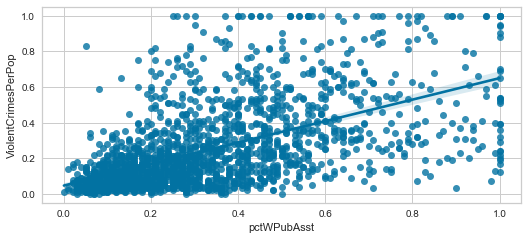

In [689]:
linear_regression(data,['pctWPubAsst'],['ViolentCrimesPerPop'],graphs=True)